In [1]:
import sys
import numpy as np
from pathlib import Path
import fnmatch
import os
import io
from opticalglass import util
import matplotlib.pyplot as plt

In [2]:
from opticalglass import rindexinfo
from opticalglass.rindexinfo import summary_plots, get_glassname_from_filestr

from opticalglass.glassfactory import create_glass

In [3]:
#import requests

# Get a list of all the Yaml files under the database root

In [4]:
db_root = '/Users/Mike/Developer/PyProjects/refractiveindexinfo/database'
path_root = Path(db_root)

In [5]:
os.getcwd()

'/Users/Mike/Developer/PyProjects/opticalglass/notebooks'

In [6]:
os.chdir(db_root)

In [7]:
log = []

# Redirect stderr
class writer(io.TextIOBase):
    def write(self, data):
        log.append(data)
        return len(data)

sys.stderr = writer()

In [8]:
files = []
offset = len(db_root)
for root, dirnames, filenames in os.walk(db_root):
#    print(f"{root[offset:]}")
    for filename in fnmatch.filter(filenames, '*.yml'):
#        print(f"    {filename}")
        files.append(os.path.join(root, filename))

In [9]:
len(files)

2827

In [10]:
url = 'https://refractiveindex.info/database/data/organic/(C16H14O3)n%20-%20polycarbonate/Zhang.yml'
url = 'https://refractiveindex.info/database/data-nk/organic/(C16H14O3)n%20-%20polycarbonate/Zhang.yml'
fname = '/Users/Mike/Developer/PyProjects/refractiveindexinfo/database/data-nk/organic/(C16H14O3)n - polycarbonate/Zhang.yml'

In [11]:
full_db_path = url[:-4].partition('database/data-nk/')[2]
name_catalog = full_db_path.split('/')
full_db_path, name_catalog

('organic/(C16H14O3)n%20-%20polycarbonate/Zhang',
 ['organic', '(C16H14O3)n%20-%20polycarbonate', 'Zhang'])

In [12]:
fname.partition('database/data-nk/')[2].split('/')

['organic', '(C16H14O3)n - polycarbonate', 'Zhang.yml']

In [13]:
get_glassname_from_filestr(fname)

('data-nk', '(C16H14O3)n - polycarbonate [Zhang.yml]', 'rii-organic')

## Polycarbonate

In [14]:
polycarb_url = 'https://refractiveindex.info/database/data-nk/organic/(C16H14O3)n%20-%20polycarbonate/Zhang.yml'
polycarb_yaml, name, catalog = rindexinfo.read_rii_url(polycarb_url)
polycarb = rindexinfo.create_material(polycarb_yaml, name, catalog)
summary_plots(polycarb, polycarb_yaml)

TypeError: tuple indices must be integers or slices, not str

In [ ]:
polycarb_url[46:].split('/')

## Ohara FPL53

In [ ]:
FPL53_url = 'https://refractiveindex.info/database/data-nk/glass/ohara/FPL53.yml'
FPL53_yaml, name, catalog = rindexinfo.read_rii_url(FPL53_url)
FPL53 = rindexinfo.create_material(FPL53_yaml, name, catalog)
summary_plots(FPL53, FPL53_yaml)

In [ ]:
get_glassname_from_filestr(FPL53_url)

## CaF2

In [ ]:
caf2_url = 'https://refractiveindex.info/database/data-nk/main/CaF2/Daimon-20.yml'
caf2_yaml, name, catalog = rindexinfo.read_rii_url(caf2_url)
caf2 = rindexinfo.create_material(caf2_yaml, name, catalog)
summary_plots(caf2, caf2_yaml)

## SiO2

In [ ]:
sio2_url = 'https://refractiveindex.info/database/data-nk/main/SiO2/Malitson.yml'
sio2 = create_glass(sio2_url, "rindexinfo")
summary_plots(sio2, sio2.yaml_data)

In [ ]:
sio2_url = 'https://refractiveindex.info/database/data-nk/main/SiO2/Malitson.yml'
sio2 = rindexinfo.create_glass(sio2_url, "rindexinfo")
summary_plots(sio2, sio2.yaml_data)

['formula 1']


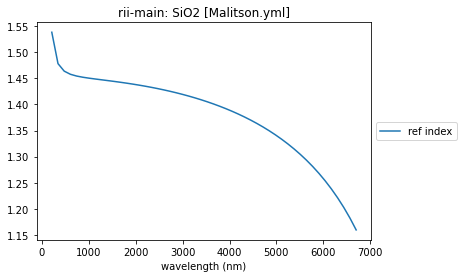

In [19]:
sio2_url = 'https://refractiveindex.info/database/data-nk/main/SiO2/Malitson.yml'
sio2_yaml, name, catalog = rindexinfo.read_rii_url(sio2_url)
sio2 = rindexinfo.create_material(sio2_yaml, name, catalog)
summary_plots(sio2, sio2_yaml[0])

In [21]:
sio2_url[46:].split('/')

['main', 'SiO2', 'Malitson.yml']

## Germanium

['tabulated nk']


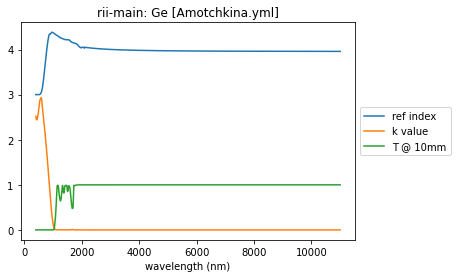

In [22]:
ge_url = 'https://refractiveindex.info/database/data-nk/main/Ge/Amotchkina.yml'
ge_yaml, name, catalog = rindexinfo.read_rii_url(ge_url)
ge = rindexinfo.create_material(ge_yaml, name, catalog)
summary_plots(ge, ge_yaml)

## ZnS from data-n2

In [23]:
zns_url = 'https://refractiveindex.info/database/data-n2/main/ZnS/Adair-o.yml'
zns_yaml, name, catalog = rindexinfo.read_rii_url(zns_url)
zns = rindexinfo.create_material(zns_yaml, name, catalog)
summary_plots(zns, zns_yaml)

['tabulated n2']


AttributeError: 'NoneType' object has no attribute 'wvls'

In [ ]:
zns_yaml

In [ ]:
full_db_path = zns_url[zns_url.find('database/'):]
name_catalog = full_db_path.split('/')[2:]
name_catalog

In [ ]:
full_db_path = zns_url[:-4].partition('database/data-')[-1][3:]
#full_db_path = zns_url[:-4].partition('database/data-n2/')[2]
name_catalog = full_db_path.split('/')
full_db_path, name_catalog

In [ ]:
zns_url[:-4]

In [ ]:
zns_url[:-4].partition('database/data-n2/')

# PEDOT

In [ ]:
pedot_filename = files[239]
pedot_filename

In [ ]:
pedot_yaml, name, catalog = rindexinfo.read_rii_file(Path(pedot_filename))
pedot = rindexinfo.create_material(pedot_yaml, name, catalog)
summary_plots(pedot, pedot_yaml)

# CCl4 - carbon tetrachloride

In [ ]:
filename = files[108]
filename

In [ ]:
CCl4_yaml, name, catalog = rindexinfo.read_rii_file(Path(filename))
CCl4 = rindexinfo.create_material(CCl4_yaml, name, catalog)
summary_plots(CCl4, CCl4_yaml)

# F1 LZOS

In [ ]:
filename = files[375]
filename

In [ ]:
F1_yaml, name, catalog = rindexinfo.read_rii_file(Path(filename))
F1 = rindexinfo.create_material(F1_yaml, name, catalog)
summary_plots(F1, F1_yaml)

In [ ]:
vars(F1)

# MgF2

In [ ]:
filename = files[2234]
filename

In [ ]:
MgF2_yaml, name, catalog = rindexinfo.read_rii_file(Path(filename))
MgF2 = rindexinfo.create_material(MgF2_yaml, name, catalog)
summary_plots(MgF2, MgF2_yaml)

# KNbO3

In [ ]:
filename = files[2173]
filename

In [ ]:
KNbO3_yaml, name, catalog = rindexinfo.read_rii_file(Path(filename))
KNbO3 = rindexinfo.create_material(KNbO3_yaml, name, catalog)
summary_plots(KNbO3, KNbO3_yaml)

In [ ]:
KNbO3.data_range

In [ ]:
KNbO3_yaml

In [ ]:
KNbO3.coefs

In [ ]:
len(KNbO3.coefs)

# Liquid crystal MLC-6608

In [ ]:
filename = files[260]
filename

In [ ]:
LC_yaml, name, catalog = rindexinfo.read_rii_file(Path(filename))
LC = rindexinfo.create_material(LC_yaml, name, catalog)
summary_plots(LC, LC_yaml)

In [ ]:
LC.data_range

In [ ]:
2373

# CdS

In [ ]:
filename = files[2373]
filename

In [ ]:
CdS_yaml, name, catalog = rindexinfo.read_rii_file(Path(filename))
CdS = rindexinfo.create_material(CdS_yaml, name, catalog)
summary_plots(CdS, CdS_yaml)

In [ ]:
CdS.data_range

In [ ]:
CdS.coefs

In [ ]:
CdS_yaml['REFERENCES']

# PtAl2

In [ ]:
filename = files[179]
filename

In [ ]:
PtAl2_yaml, name, catalog = rindexinfo.read_rii_file(Path(filename))
PtAl2 = rindexinfo.create_material(PtAl2_yaml, name, catalog)
summary_plots(PtAl2, PtAl2_yaml)

# C2ClF3

In [ ]:
filename = files[43]
filename

In [ ]:
C2ClF3_yaml, name, catalog = rindexinfo.read_rii_file(Path(filename))
try:
    C2ClF3 = rindexinfo.create_material(C2ClF3_yaml, name, catalog)
except Exception as err:
    print(err)
else:
    summary_plots(C2ClF3, C2ClF3_yaml)

In [ ]:
C2ClF3_yaml